In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import *
from matplotlib import pyplot
from time import time
from datetime import datetime
import feather

In [2]:
from xgboost import *

# data preparation

In [ ]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "mkt_with_11_group_id_20170712.csv"
train_df = pd.read_csv(path + filename, error_bad_lines=False)

In [ ]:
# train_df[train_df.columns[24]]
for i in (24,28,76,97,98,99,100,101,102):
    train_df[train_df.columns[i]] = train_df[train_df.columns[i]].apply(pd.to_numeric, errors = 'coerce')
    train_df[train_df.columns[i]] = train_df[train_df.columns[i]].fillna(0)

In [ ]:
def DATE_to_num(date_str):
    try:
        date = datetime.strptime(date_str, "%Y/%m/%d")
    except:
        return 0
    else:
        date_pivot = datetime.strptime('2017/4/1', "%Y/%m/%d")
        delta = date_pivot - date
        return delta.days

In [ ]:
for c in train_df.columns:
    if 'DATE' in c and train_df[c].dtypes == np.object:
        train_df[c] = train_df[c].apply(DATE_to_num)
        train_df[c] = train_df[c].apply(pd.to_numeric, errors = 'coerce')
    elif ('CNT' in c or 'DUR' in c or 'AMT' in c) and train_df[c].dtypes == np.object:
        train_df[c] = train_df[c].apply(pd.to_numeric, errors = 'coerce')
        train_df[c] = train_df[c].fillna(0)

In [ ]:
for c in train_df.columns:
    if 'ID' in c:
        train_df = train_df.drop(c, 1)

In [ ]:
# path = 'D:/date_to_num.feather'
# feather.write_dataframe(train_df, path)
# train_df = feather.read_dataframe(path)
path = 'D:/date_to_num.csv'
train_df.to_csv(path, encoding = "utf-8")

In [5]:
for c in train_df.columns:
    if 'HS_USE' in c:
        train_df[c] = train_df[c].apply(pd.to_numeric, errors = 'coerce')
        train_df[c] = train_df[c].fillna(0)
        print(train_df[c].head())

0     7.0
1    21.0
2     0.0
3     6.0
4     0.0
Name: HS_USE_MONTH, dtype: float64
0     7.0
1    33.0
2     0.0
3     6.0
4     0.0
Name: AVG_HS_USE_MONTH, dtype: float64
0     0.0
1    40.0
2     0.0
3     0.0
4     0.0
Name: AVG_HS_USE_MONTH_EX_CURR, dtype: float64


In [3]:
path = 'D:/date_to_num.csv'
train_df = pd.read_csv(path, error_bad_lines=False)

In [4]:
train_df = train_df.drop(train_df.columns[0], 1)
train_df

,DATA_MONTH,MINING_DW_SUBSCR_NO,DATA_MONTH_RPT_TEMP1,DATA_MONTH_RPT_TEMP2,DATA_MONTH_RPT,RENEW_IND,GA_IND,ACTV_TYPE,GA_DATE,CHURN_IND,...,L2M_DEVICE_PRICE_TIER,L2M_DEVICE_TYPE,HS_CHG_CNT,AVG_HS_USE_MONTH,AVG_HS_USE_MONTH_EX_CURR,ZONE_ACTV_IVR_COUNTRY,ZONE_ACTV_IVR_REGION,STORE_TYPE,SPAUTH_IND,Groups
0,2017/4/1,8134330931,2017/4/1,2017/4/1,2017/4/1,N,N,PURE GA,599,N,...,?,?,1.0,7.0,?,?,?,Mini-New(Y2013),N,InstantMessage-Low
1,2017/4/1,2118544651,2017/4/1,2017/4/1,2017/4/1,N,N,PURE GA,6749,N,...,?,2G H/S,3.0,33.0,40,?,?,?,N,Infrequent_User
2,2017/4/1,10000337216,2017/4/1,2017/4/1,2017/4/1,N,N,MNP,179,N,...,?,?,0.0,?,?,高雄市,左營區,Store,N,No_ignificant_preference
3,2017/4/1,3133428916,2017/4/1,2017/4/1,2017/4/1,N,N,MNP,691,N,...,?,?,1.0,6.0,?,新北市,瑞芳區,Store,N,No_ignificant_preference
4,2017/4/1,3135493626,2017/4/1,2017/4/1,2017/4/1,N,N,MNP,475,N,...,?,?,0.0,?,?,?,?,Mini-New(Y2012),N,InstantMessage-Low
5,2017/4/1,3125061767,2017/4/1,2017/4/1,2017/4/1,N,N,MNP,1787,N,...,?,?,0.0,?,?,台北市,大同區,閉店,N,InstantMessage-Low
6,2017/4/1,8131713026,2017/4/1,2017/4/1,2017/4/1,N,N,MNP,835,N,...,?,?,1.0,15.0,?,新北市,土城區,聯歐,N,InstantMessage-High
7,2017/4/1,3117930663,2017/4/1,2017/4/1,2017/4/1,N,N,PURE GA,3020,N,...,HH,Smart Phone-3G,3.0,11.0,9,屏東縣,屏東,長谷,N,InstantMessage-High
8,2017/4/1,3133731219,2017/4/1,2017/4/1,2017/4/1,N,N,MV,663,N,...,?,?,1.0,7.0,?,?,?,?,N,Social-media
9,2017/4/1,10000354353,2017/4/1,2017/4/1,2017/4/1,N,N,MNP,176,N,...,?,?,0.0,?,?,台中市,中區,哈拉網通,N,Infrequent_User


In [9]:
# train_df['SMS_PROM_IND'].value_counts().keys()[0]
# train_df['ACTV_TYPE'].value_counts()
train_df.dtypes
# train_df

DATA_MONTH                         object
MINING_DW_SUBSCR_NO                 int64
DATA_MONTH_RPT_TEMP1               object
DATA_MONTH_RPT_TEMP2               object
DATA_MONTH_RPT                     object
RENEW_IND                           int64
GA_IND                              int64
ACTV_TYPE                          object
GA_DATE                             int64
CHURN_IND                           int64
CHURN_TYPE                         object
INACTV_DATE                         int64
MKT_CHURN_DATE                      int64
SUSPEND_IND                         int64
TEMP_INACTV_DATE                    int64
SRV_TYPE_DESC                      object
RPS_NAME                           object
SUBSCR_STATUS_CODE                 object
GENDER_CODE                        object
P6M_AVG_NET_INV_AMT               float64
AGE                               float64
TENURE_SCV                        float64
BILL_CITY_NAME                     object
BILL_DISTRICT_NAME                

In [6]:
total_len = len(train_df)
for c in train_df.columns:
    if c == 'Groups':
        continue
    if train_df[c].dtypes == np.object:
        value_cnt = train_df[c].value_counts()
        value_cnt_num = value_cnt.values
        value_cnt_key = value_cnt.keys()
        if "IND" in c:
            map_dict = {}
            for k in value_cnt_key:
                if k == 'Y':
                    map_dict[k] = 1
                else:
                    map_dict[k] = 0
            train_df[c] = train_df[c].map(map_dict)
            print(c)
            continue
            
        tmp_total = 0
        feature_num = 10
        for i in range(len(value_cnt_num)):
            tmp_total += value_cnt_num[i]
            if tmp_total / total_len > 0.8:
                feature_num = i
                break
        map_dict = {}
        for k in value_cnt_key[:feature_num + 1]:
            map_dict[k] = k
        for k in value_cnt_key[feature_num + 1:]:
            map_dict[k] = 'other'
        train_df[c] = train_df[c].map(map_dict)
#         train_df[c] = train_df[c].apply(lambda x: x if x in value_cnt_key[:feature_num + 1] else 'other')
        print(c)


DATA_MONTH
DATA_MONTH_RPT_TEMP1
DATA_MONTH_RPT_TEMP2
DATA_MONTH_RPT
RENEW_IND
GA_IND
ACTV_TYPE
CHURN_IND
CHURN_TYPE
SUSPEND_IND
SRV_TYPE_DESC
RPS_NAME
SUBSCR_STATUS_CODE
GENDER_CODE
BILL_CITY_NAME
BILL_DISTRICT_NAME
CHANNEL_CHURN_INDEX
CHURN_INDEX
FETNET_IND
SMS_PROM_IND
IMEI_TYPE
IMEI_MFG_NAME
IMEI_MKT_NAME
IMEI_SMART_OS_FLAG
BL_CYCLE_DESC
ZONE_ACTIVATION_IVR
ACTV_CHANNEL_NAME
SHIPMENT_CHANNEL_CODE
SHIPMENT_CHANNEL_NAME
HAPPYGO_IND
SEGMENT_NAME
IMEI_BAND
NP_IN_IND
MSISDN_LAST_NP_OUT_IND
BONDING_FLAG
CHURN_CLM_IND
CHURN_WELCOME_STAGE
PTY_NP_IN_IND
PTY_NP_OUT_IND
MDS_CURR_RENEW_TYPE
MDS_ELIGIBLE_FLAG
PROM_BUNDLE_VRP
PROM_BUNDLE_DRP
PROM_CURR_PROM_CODE
PROM_CURR_PROM_NAME
PROM_CURR_PROMOTION_TYPE
PROM_CURR_PROMOTION_SUB_TYPE
PROM_CURR_SYS_MODEL_IND
PROM_DEVICE_TYPE
PROM_DEVICE_BRAND
PROM_DEVICE_OS
PROM_DEVICE_MODEL
PROM_ACTV_PROM_CODE
PROM_ACTV_PROM_NAME
PROM_ACTV_PROM_TYPE
PROM_ACTV_PROM_SUB_TYPE
PROM_ACTV_PROM_CATG
L1M_PROM_CODE
L1M_PROM_NAME
DUM_PROM_CODE
AGENCY_FLAG
GOOGLE_PLAY_IND
G

In [7]:
path = 'D:/date_to_num_cut_down_cate.csv'
train_df.to_csv(path, encoding = "utf-8")

In [8]:
# for checking
too_much_cate_col = []
for c in train_df.columns:
    if train_df[c].dtypes == np.object:
        val_c = len(train_df[c].value_counts())
        if val_c > 110:
            print(c, val_c)
            print(train_df[c].head())
            print("----------------------------")
            too_much_cate_col.append(c)

ACTV_CHANNEL_NAME 496
0             other
1                 ?
2    1803114_高雄五甲二特
3    1801104_基隆大武崙特
4              新店中正
Name: ACTV_CHANNEL_NAME, dtype: object
----------------------------
SHIPMENT_CHANNEL_CODE 448
0      other
1      other
2    1803051
3    1805109
4       2433
Name: SHIPMENT_CHANNEL_CODE, dtype: object
----------------------------
SHIPMENT_CHANNEL_NAME 358
0             other
1                 ?
2    1803051_高雄華夏特約
3    1805109_台北瑞芳特約
4              新店中正
Name: SHIPMENT_CHANNEL_NAME, dtype: object
----------------------------
PROM_CURR_PROM_CODE 233
0           other
1    VPW00FN-YFY4
2    PFC00FN-YFY4
3    EGL00FP-YFY3
4    EGL00FP-YFY3
Name: PROM_CURR_PROM_CODE, dtype: object
----------------------------
PROM_CURR_PROM_NAME 233
0                                                other
1             VPW00FN-YFY4 3轉4續約-省更大月租499_新絕配599限30手機案
2           PFC00FN-YFY4 卡友-iPhone-限NP 4G新絕配1399限30手機案
3    EGL00FP-YFY3 (專)犀利攜碼-哈啦398限30+飆網770限30手機專案-預繳3600
4    EGL00FP-YFY3 (專)

In [10]:
# dont use this
for c in too_much_cate_col:
    train_df = train_df.drop(c, 1)

In [11]:
cate_df = pd.DataFrame()
num_df = pd.DataFrame()
for c in train_df.columns:
    if train_df[c].dtypes == np.object:
        cate_df[c] = train_df[c]
    else:
        num_df[c] = train_df[c]

In [12]:
label = cate_df[cate_df.columns[-1]]
cate_df = pd.get_dummies(cate_df[cate_df.columns[:-1]], prefix = cate_df.columns[:-1])
cate_df

,DATA_MONTH_2017/4/1,DATA_MONTH_RPT_TEMP1_2017/4/1,DATA_MONTH_RPT_TEMP1_other,DATA_MONTH_RPT_TEMP2_2017/4/1,DATA_MONTH_RPT_TEMP2_other,DATA_MONTH_RPT_2017/4/1,DATA_MONTH_RPT_other,ACTV_TYPE_MNP,ACTV_TYPE_PURE GA,ACTV_TYPE_other,...,STORE_TYPE_Mini-New(Y2012),STORE_TYPE_Mini-New(Y2013),STORE_TYPE_Regular,STORE_TYPE_Store,STORE_TYPE_other,STORE_TYPE_勃菱(六二屋),STORE_TYPE_潗濠,STORE_TYPE_聯歐,STORE_TYPE_長谷,STORE_TYPE_閉店
0,1,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5,1,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
train_df = pd.concat([num_df, cate_df], axis = 1)
train_df['Group'] = label

In [14]:
train_df

,MINING_DW_SUBSCR_NO,RENEW_IND,GA_IND,GA_DATE,CHURN_IND,INACTV_DATE,MKT_CHURN_DATE,SUSPEND_IND,TEMP_INACTV_DATE,P6M_AVG_NET_INV_AMT,...,STORE_TYPE_Mini-New(Y2013),STORE_TYPE_Regular,STORE_TYPE_Store,STORE_TYPE_other,STORE_TYPE_勃菱(六二屋),STORE_TYPE_潗濠,STORE_TYPE_聯歐,STORE_TYPE_長谷,STORE_TYPE_閉店,Group
0,8134330931,0,0,599,0,0,0,0,0,550.13,...,1,0,0,0,0,0,0,0,0,InstantMessage-Low
1,2118544651,0,0,6749,0,0,0,0,0,506.88,...,0,0,0,0,0,0,0,0,0,Infrequent_User
2,10000337216,0,0,179,0,0,0,0,0,1208.96,...,0,0,1,0,0,0,0,0,0,No_ignificant_preference
3,3133428916,0,0,691,0,0,0,0,0,700.57,...,0,0,1,0,0,0,0,0,0,No_ignificant_preference
4,3135493626,0,0,475,0,0,0,0,0,733.17,...,0,0,0,0,0,0,0,0,0,InstantMessage-Low
5,3125061767,0,0,1787,0,0,0,0,0,658.30,...,0,0,0,0,0,0,0,0,1,InstantMessage-Low
6,8131713026,0,0,835,0,0,0,0,0,1423.18,...,0,0,0,0,0,0,1,0,0,InstantMessage-High
7,3117930663,0,0,3020,0,0,0,0,631,504.87,...,0,0,0,0,0,0,0,1,0,InstantMessage-High
8,3133731219,0,0,663,0,0,0,0,0,1078.10,...,0,0,0,0,0,0,0,0,0,Social-media
9,10000354353,0,0,176,0,0,0,0,0,606.14,...,0,0,0,1,0,0,0,0,0,Infrequent_User


In [15]:
# path = 'D:/one_hot.feather'
# feather.write_dataframe(train_df, path)
# train_df = feather.read_dataframe(path)
path = 'D:/one_hot_0724.csv'
train_df.to_csv(path, index=False, encoding = "utf-8")

In [ ]:
def shuffle(matrix, test_proportion):
    ratio = matrix.shape[0]/test_proportion
    train = matrix[ratio:,:]
    test =  matrix[:ratio,:]
#     Y_train = target[ratio:,:]
#     Y_test =  target[:ratio,:]
    return train, test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
# train, test = shuffle(train_df.values, 3)
# train_df

In [ ]:
path = 'D:/one_hot_train.csv'
train_df.to_csv(path, encoding = "utf-8")

In [21]:
# X_train = train[:, 0:-1]
# y_train = train[:, -1]
# X_test = test[:, 0:-1]
# y_test = test[:, 0:-1]
X = train_df.iloc[:, 0:-1]
y = train_df.iloc[:, -1]

In [16]:
del cate_df
del num_df

# data rescue

In [ ]:
label = train_df[train_df.columns[-11:]]
train_df = train_df.drop(train_df.columns[-11:], 1)

In [ ]:
def reverse(row):
    for c in label.columns:
        if row[c] == 1:
            return c[7:]

In [ ]:
train_df['Group'] = label.apply(reverse, axis = 1)
train_df[train_df.columns[-11:]].head()

In [ ]:
for c in train_df.columns:
    if train_df[c].dtypes == np.object:
        print(c)

# categorical feature encoding without one hot encode

In [ ]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "0719_april_marketing_anylze_full_table_group11_max_min_train.csv"
train_df = pd.read_csv(path + filename, error_bad_lines=False)

In [ ]:
X_train = train_df.iloc[:, 0:-1].values
y_train = train_df.iloc[:, -1].values

In [ ]:
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
filename = "0719_april_marketing_anylze_full_table_group11_max_min_test.csv"
test_df = pd.read_csv(path + filename, error_bad_lines=False)

In [ ]:
X_test = test_df.iloc[:, 0:-1].values
y_test = test_df.iloc[:, -1].values

In [7]:
path = 'D:/one_hot_0724.csv'
train_df = pd.read_csv(path, error_bad_lines=False)

In [8]:
rain_df.drop('Unnamed: 0', 1, inplace=True)
train_df

,Unnamed: 0,MINING_DW_SUBSCR_NO,RENEW_IND,GA_IND,GA_DATE,CHURN_IND,INACTV_DATE,MKT_CHURN_DATE,SUSPEND_IND,TEMP_INACTV_DATE,...,STORE_TYPE_Mini-New(Y2013),STORE_TYPE_Regular,STORE_TYPE_Store,STORE_TYPE_other,STORE_TYPE_勃菱(六二屋),STORE_TYPE_潗濠,STORE_TYPE_聯歐,STORE_TYPE_長谷,STORE_TYPE_閉店,Group
0,0,8134330931,0,0,599,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,InstantMessage-Low
1,1,2118544651,0,0,6749,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Infrequent_User
2,2,10000337216,0,0,179,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,No_ignificant_preference
3,3,3133428916,0,0,691,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,No_ignificant_preference
4,4,3135493626,0,0,475,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,InstantMessage-Low
5,5,3125061767,0,0,1787,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,InstantMessage-Low
6,6,8131713026,0,0,835,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,InstantMessage-High
7,7,3117930663,0,0,3020,0,0,0,0,631,...,0,0,0,0,0,0,0,1,0,InstantMessage-High
8,8,3133731219,0,0,663,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Social-media
9,9,10000354353,0,0,176,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Infrequent_User


In [9]:
# train_df.drop(train_df['Group'] == 'Infrequent_User', inplace=True)
train_df = train_df[train_df['Group'] != 'Infrequent_User']
train_df.drop('MINING_DW_SUBSCR_NO', 1, inplace=True)
train_df.groupby('Group').count()

C:\Users\VIPLAB\AppData\Local\conda\conda\envs\keras\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,RENEW_IND,GA_IND,GA_DATE,CHURN_IND,INACTV_DATE,MKT_CHURN_DATE,SUSPEND_IND,TEMP_INACTV_DATE,P6M_AVG_NET_INV_AMT,...,STORE_TYPE_Mini-New(Y2012),STORE_TYPE_Mini-New(Y2013),STORE_TYPE_Regular,STORE_TYPE_Store,STORE_TYPE_other,STORE_TYPE_勃菱(六二屋),STORE_TYPE_潗濠,STORE_TYPE_聯歐,STORE_TYPE_長谷,STORE_TYPE_閉店
Group,,,,,,,,,,,,,,,,,,,,,
Adult,54309,54309,54309,54309,54309,54309,54309,54309,54309,54309,...,54309,54309,54309,54309,54309,54309,54309,54309,54309,54309
Game,87618,87618,87618,87618,87618,87618,87618,87618,87618,87618,...,87618,87618,87618,87618,87618,87618,87618,87618,87618,87618
HomeLife,74949,74949,74949,74949,74949,74949,74949,74949,74949,74949,...,74949,74949,74949,74949,74949,74949,74949,74949,74949,74949
InstantMessage-High,424699,424699,424699,424699,424699,424699,424699,424699,424699,424699,...,424699,424699,424699,424699,424699,424699,424699,424699,424699,424699
InstantMessage-Low,431903,431903,431903,431903,431903,431903,431903,431903,431903,431903,...,431903,431903,431903,431903,431903,431903,431903,431903,431903,431903
Map,103786,103786,103786,103786,103786,103786,103786,103786,103786,103786,...,103786,103786,103786,103786,103786,103786,103786,103786,103786,103786
News,57174,57174,57174,57174,57174,57174,57174,57174,57174,57174,...,57174,57174,57174,57174,57174,57174,57174,57174,57174,57174
No_ignificant_preference,266966,266966,266966,266966,266966,266966,266966,266966,266966,266966,...,266966,266966,266966,266966,266966,266966,266966,266966,266966,266966
Portal,98614,98614,98614,98614,98614,98614,98614,98614,98614,98614,...,98614,98614,98614,98614,98614,98614,98614,98614,98614,98614


In [10]:
train_df

,Unnamed: 0,RENEW_IND,GA_IND,GA_DATE,CHURN_IND,INACTV_DATE,MKT_CHURN_DATE,SUSPEND_IND,TEMP_INACTV_DATE,P6M_AVG_NET_INV_AMT,...,STORE_TYPE_Mini-New(Y2013),STORE_TYPE_Regular,STORE_TYPE_Store,STORE_TYPE_other,STORE_TYPE_勃菱(六二屋),STORE_TYPE_潗濠,STORE_TYPE_聯歐,STORE_TYPE_長谷,STORE_TYPE_閉店,Group
0,0,0,0,599,0,0,0,0,0,550.13,...,1,0,0,0,0,0,0,0,0,InstantMessage-Low
2,2,0,0,179,0,0,0,0,0,1208.96,...,0,0,1,0,0,0,0,0,0,No_ignificant_preference
3,3,0,0,691,0,0,0,0,0,700.57,...,0,0,1,0,0,0,0,0,0,No_ignificant_preference
4,4,0,0,475,0,0,0,0,0,733.17,...,0,0,0,0,0,0,0,0,0,InstantMessage-Low
5,5,0,0,1787,0,0,0,0,0,658.30,...,0,0,0,0,0,0,0,0,1,InstantMessage-Low
6,6,0,0,835,0,0,0,0,0,1423.18,...,0,0,0,0,0,0,1,0,0,InstantMessage-High
7,7,0,0,3020,0,0,0,0,631,504.87,...,0,0,0,0,0,0,0,1,0,InstantMessage-High
8,8,0,0,663,0,0,0,0,0,1078.10,...,0,0,0,0,0,0,0,0,0,Social-media
11,11,0,0,461,0,0,0,0,0,137.35,...,0,0,0,0,0,0,0,0,0,InstantMessage-Low
12,12,0,0,313,0,0,0,0,0,1012.66,...,0,0,0,1,0,0,0,0,0,No_ignificant_preference


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738988 entries, 0 to 1884094
Columns: 1066 entries, Unnamed: 0 to Group
dtypes: float64(54), int64(1011), object(1)
memory usage: 13.8+ GB


In [12]:
X = train_df.iloc[:, 0:-1]
y = train_df.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
# model = XGBClassifier(n_jobs = -1)
# model.fit(X_train, y_train)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
param_grid = {
    'n_estimators':[50]
}

In [ ]:
# cross validation
t0 = time()
model = XGBClassifier(n_jobs = -1)
# model = XGBClassifier(**{'updater': 'grow_gpu'})
# kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=7)
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
gs.fit(X, y)
print("training time:  %.2f" % (time()-t0))

In [14]:
# normal XGBClassifier
t0 = time()
model = XGBClassifier(n_estimators=50 ,n_jobs=-1)
model.fit(X_train, y_train)
print("training time:  %.2f" % (time()-t0))

OSError: [WinError -529697949] Windows Error 0xe06d7363

In [ ]:
pred = model.predict(X_train)

In [ ]:
accuracy = accuracy_score(y_train, pred)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

In [29]:
pred = model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

Test Accuracy: 35.21%


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001F6696B7FD0>>
Traceback (most recent call last):
  File "C:\Users\VIPLAB\AppData\Local\conda\conda\envs\keras\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\core.py", line 343, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001F669695A90>>
Traceback (most recent call last):
  File "C:\Users\VIPLAB\AppData\Local\conda\conda\envs\keras\lib\site-packages\xgboost-0.6-py3.5.egg\xgboost\core.py", line 343, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


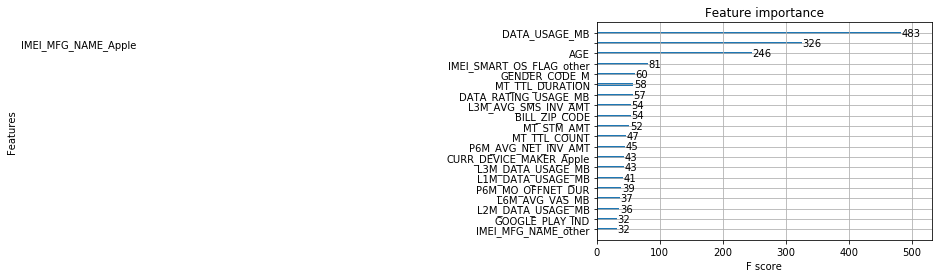

In [13]:
plot_importance(model, max_num_features = 20)
pyplot.show()

In [ ]:
test_df.columns[166]

In [14]:
col_rank = pd.DataFrame()

In [16]:
col_rank['column_name'] = train_df.columns[:-1]

In [17]:
col_rank['importance'] = model.feature_importances_

In [18]:
col_rank = col_rank.sort_values('importance', ascending = False)

In [19]:
# np.sum(col_rank['importance'].values) -> 1.0
np.sum(col_rank['importance'].values[:33])

0.89428574

In [20]:
col_rank.iloc[:33]

,column_name,importance
113,DATA_USAGE_MB,0.197143
339,IMEI_MFG_NAME_Apple ...,0.133061
10,AGE,0.100408
418,IMEI_SMART_OS_FLAG_other,0.033061
219,GENDER_CODE_M,0.024490
89,MT_TTL_DURATION,0.023673
165,DATA_RATING_USAGE_MB,0.023265
12,BILL_ZIP_CODE,0.022041
66,L3M_AVG_SMS_INV_AMT,0.022041
68,MT_STM_AMT,0.021224


In [32]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix

array([[37066, 12640,   403,     0,   710,     0,  7223],
       [13689, 71679, 45385,     0,  4033,     0, 35093],
       [ 4042, 46067, 75628,     0,  6451,     0, 40556],
       [  248,  8922, 31539,     0,   166,     0,   609],
       [ 5181, 22908, 23540,     0, 11022,     0, 44440],
       [ 2398, 19196, 12855,     0,  2437,     0, 18463],
       [ 6615, 33670, 29929,     0,  8853,     0, 69982]])

## save model

In [22]:
model._Booster.save_model('xgboost_onehot_without_infreq_0724.model')

In [ ]:
import winsound
winsound.PlaySound('crows.wav', winsound.SND_FILENAME)

## load model

In [ ]:
clf = XGBClassifier()
booster = Booster()
booster.load_model('xgboost_basic_0720.model')
clf._Booster = booster

In [ ]:
plot_importance(clf, max_num_features = 20)
pyplot.show()

In [24]:
del train_df

In [25]:
del X_train
del y_train

In [28]:
del X
del y